# LAB: (quasi-) Newton methods

Author : Alexandre Gramfort

The objective of this lab session is to implement:
- Newton method
- DFP
- BFGS
and compare your implementation with the BFGS and L-BFGS solvers in scipy

You will need to knowledge on **line search methods** and **conjugate gradient** in particular you should reuse the notebooks presented during the lectures.

## VERY IMPORTANT

- This work **must be done by pairs of students**.
- **Each** student must send their work **before the 30th of october at 23:59**, using the **moodle platform**.
- This means that **each student in the pair sends the same file**
- On the moodle, in the "Optimization for Data Science" course, you have a "devoir" section called **Rendu TP du 24 octobre 2016**. This is where you submit your jupyter notebook file. 
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [180]:
# Change here using YOUR first and last names
fn1 = "salma"
ln1 = "el-alaoui-talibi"
fn2 = "sophia"
ln2 = "lazraq"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp_newton", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

tp_newton_el-alaoui-talibi_salma_and_lazraq_sophia.ipynb


# Part 0: Demo using Gradient descent

First import the necessary libraries:

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, linalg

%matplotlib inline

Now import the necessary function from the optim_utils.py file.

In [182]:
from optim_utils import test_solver

You'll have work only with the `test_solver` function.

This function expects a function as parameter.

The signature of the function `optimizer` to pass should be the following:

`optimizer(x0, f, f_grad, f_hessian)`

Let us now make an example with a gradient descent.

In [183]:
def gradient_descent(x0, f, f_grad, f_hessian=None):

    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = False

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              -grad_x, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x -= step * grad_x

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)

Now I can call the `test_solver` function with this solver:


Running solver on case 1

Running solver on case 2

Running solver on case 3


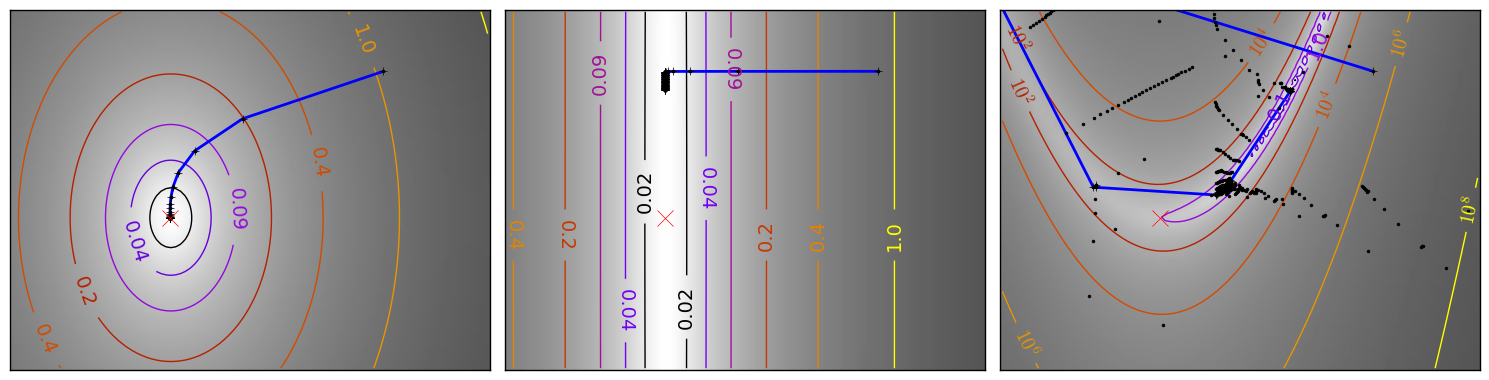

In [184]:
test_solver(gradient_descent)

# Part 2: Implement Newton method

You now need to implement Newton method using either `linalg.solve` or `sparse.linalg.cg` solve the linear system at each iteration. You need to implement both versions.

You're expected to comment in a few lines what you see.

In [185]:
import scipy.linalg as linalg
import scipy as scipy

def newton(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)
        
        ####################################
        # Compute here the search direction
        # d = ...
        ####################################
        
        #d = linalg.solve(-f_hessian(x), grad_x)
        d, _ = scipy.sparse.linalg.cg(-f_hessian(x), grad_x)
        
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x, c1=c1, c2=c2)
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        # x = ...
        ##################################
        x += step * d
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 2
iter: 1, f: 3.40668e-26, l_inf_norm(grad): 2.12057e-13

Running solver on case 3
iter: 1, f: 0.357547, l_inf_norm(grad): 1.19858
iter: 2, f: 0.253454, l_inf_norm(grad): 14.6168
iter: 3, f: 0.137976, l_inf_norm(grad): 3.9843
iter: 4, f: 0.088137, l_inf_norm(grad): 6.14586
iter: 5, f: 0.0414804, l_inf_norm(grad): 3.93321
iter: 6, f: 0.0162138, l_inf_norm(grad): 2.7976
iter: 7, f: 0.00446914, l_inf_norm(grad): 1.29953
iter: 8, f: 0.000705202, l_inf_norm(grad): 0.668389
iter: 9, f: 3.34966e-05, l_inf_norm(grad): 0.121298
iter: 10, f: 1.24866e-07, l_inf_norm(grad): 0.00982241
iter: 11, f: 2.01025e-12, l_inf_norm(grad): 3.05844e-05
iter: 12, f: 5.2958e-22, l_inf_norm(grad): 6.41073e-10


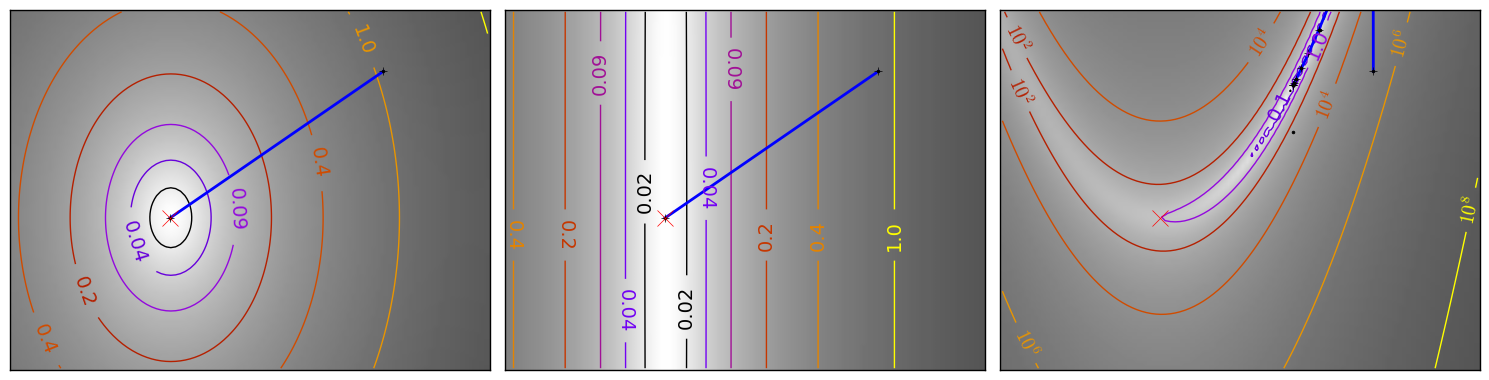

In [186]:
test_solver(newton)

#### Comments

As expected, we can see that the newton method converges in one iterations for the two quadratic functions, independently of the conditioning of the functions. For the Rosenbrock function, which very ill conditioned, it converges in only 12 iterations.

# Part 2: Implement DFP algorithm

You now need to implement the DFP algorithm.

In [187]:
def dfp(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.95
    max_iter = 200
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B = np.eye(len(x))  # inverse Hessian approximation

    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        ####################################
        # Compute here the search direction
        # d = ...
        ####################################    
        d = -np.dot(B, grad_x)
        
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        # x = ...
        ##################################
        x += step * d
        #########################################################
        # Update the inverse Hessian approximation
        # B = ...
        #########################################################
        s = step * d
        s = s[:, None]
        y = new_grad - grad_x
        y = y[:, None]
        B = B + np.dot(s, s.T)/np.dot(s.T, y) - np.dot(B, np.dot(y, np.dot(y.T,B)))/ np.dot(y.T, np.dot(B,y))
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0214911, l_inf_norm(grad): 0.114753
iter: 3, f: 0.00899657, l_inf_norm(grad): 0.069501
iter: 4, f: 0.00023476, l_inf_norm(grad): 0.0175216
iter: 5, f: 1.76801e-05, l_inf_norm(grad): 0.00465113
iter: 6, f: 3.20353e-08, l_inf_norm(grad): 0.000140183
iter: 7, f: 1.32183e-10, l_inf_norm(grad): 8.99094e-06
iter: 8, f: 8.82459e-15, l_inf_norm(grad): 1.04309e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000138677, l_inf_norm(grad): 0.000270594
iter: 4, f: 1.92681e-07, l_inf_norm(grad): 0.000503909
iter: 5, f: 1.4273e-07, l_inf_norm(grad): 0.000433799
iter: 6, f: 3.512e-14, l_inf_norm(grad): 1.6706e-08

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.56575, l_inf_norm(grad): 24.138
iter: 3, f: 7.34339, l_inf_norm(grad): 4.87789
iter: 4, f: 7.29892, l_inf_norm(grad): 8.4

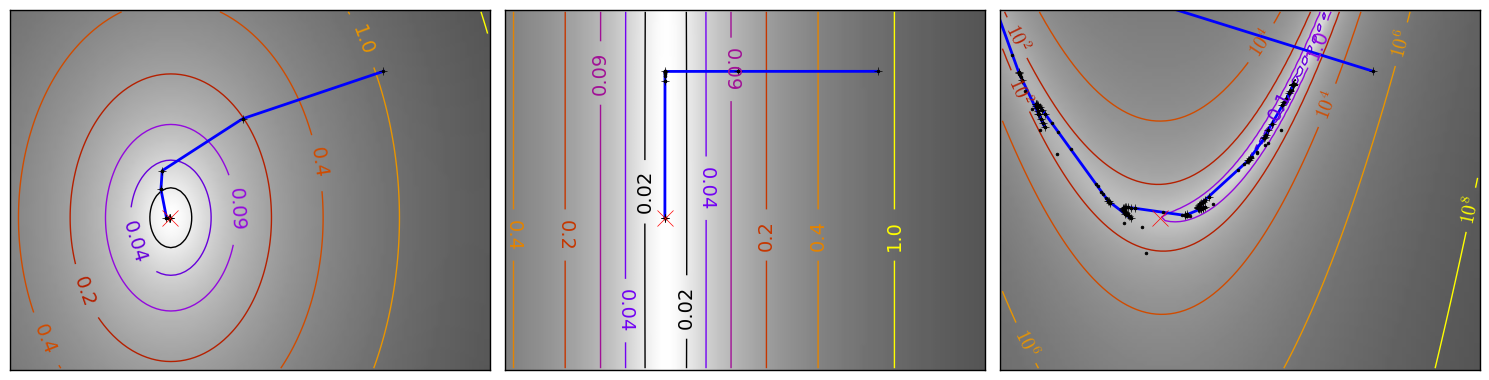

In [188]:
test_solver(dfp)

#### Comments 
We can see that for the 2 quadratic functions, DFP converges in more than 2 iterations because we use inexact line search with Wolfe's rule, which is more cost effective than exact line search; but convergence is still achieved in a small number of iterations in the quadratic case.

# Part 3: Implement BFGS algorithm

You now need to implement the BFGS algorithm.

In [189]:
def bfgs(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    H = np.eye(len(x))  # Hessian approximation
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        ####################################
        # Compute here the search direction
        # d = ...
        ####################################
        d = -linalg.solve(H, grad_x)
        
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=1e-4, c2=0.9)

        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################    
        # Compute here the new value of x
        # x = ...
        ##################################
        x += step * d
        #####################################################
        # Update the Hessian approximation   
        # H = ...
        #####################################################
        s = step * d
        s = s[:, None]
        y = new_grad - grad_x
        y = y[:, None]
        H = H + np.dot(y, y.T)/np.dot(y.T, s) - np.dot(H, np.dot(s, np.dot(s.T, H)))/np.dot(s.T, np.dot(H,s))
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0209281, l_inf_norm(grad): 0.11324
iter: 3, f: 0.00806831, l_inf_norm(grad): 0.0656686
iter: 4, f: 3.9809e-05, l_inf_norm(grad): 0.00723054
iter: 5, f: 4.69973e-07, l_inf_norm(grad): 0.000735419
iter: 6, f: 7.22702e-11, l_inf_norm(grad): 6.78586e-06
iter: 7, f: 2.47614e-14, l_inf_norm(grad): 1.18656e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000119306, l_inf_norm(grad): 0.00025098
iter: 4, f: 6.91982e-13, l_inf_norm(grad): 9.54949e-07

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.59071, l_inf_norm(grad): 26.034
iter: 3, f: 7.34411, l_inf_norm(grad): 4.87129
iter: 4, f: 7.29555, l_inf_norm(grad): 8.30631
iter: 5, f: 6.98403, l_inf_norm(grad): 49.3631
iter: 6, f: 6.72314, l_inf_norm(grad): 26.9831
iter: 7, f: 6.31556, l_inf_norm(grad): 14.5499
iter: 8, f: 5.

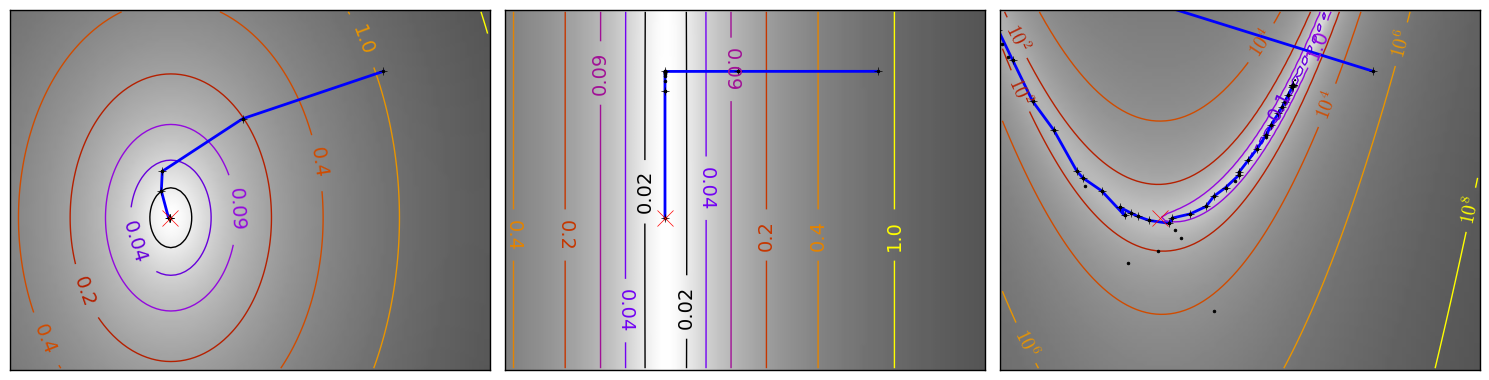

In [190]:
test_solver(bfgs)

#### Comments 

BFGS converges faster than DFP in the quadradic case, and **twice as fast** for the Rosenbrock function, which is due to the fact that BFGS is more robust to the use of inexact line search. 

We should however note that our implementation here is naive, because it requires solving the system $d_k = -H_k^{-1}\nabla f(x_k)$ to obtain the step $\rho_k$, which increases the cost of the step computation to $O(n^3)$ (compared with $O(n^2)$ for DFP). An implemetation wih a $O(n^2)$ cost for the step is possible by using the Cholesky factorization of $H_k$, which we do below:


In [ ]:
def bfgs_cholesky(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    H = np.eye(len(x))  # Hessian approximation
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        ####################################
        # Compute here the search direction
        # d = ...
        ####################################
       
        d = -linalg.cho_solve(linalg.cho_factor(H, lower=True), grad_x)
         
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
 
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################    
        # Compute here the new value of x
        # x = ...
        ##################################
        x += step * d
        #####################################################
        # Update the Hessian approximation   
        # H = ...
        #####################################################
        s = step * d
        s = s[:, None]
        y = new_grad - grad_x
        y = y[:, None]
        H = H + np.dot(y, y.T)/np.dot(y.T, s) - np.dot(H, np.dot(s, np.dot(s.T, H)))/np.dot(s.T, np.dot(H,s))
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad <= 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)

In [ ]:
test_solver(bfgs_cholesky)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0209281, l_inf_norm(grad): 0.11324
iter: 3, f: 0.00806831, l_inf_norm(grad): 0.0656686
iter: 4, f: 3.9809e-05, l_inf_norm(grad): 0.00723054
iter: 5, f: 4.69973e-07, l_inf_norm(grad): 0.000735419
iter: 6, f: 7.22702e-11, l_inf_norm(grad): 6.78586e-06
iter: 7, f: 2.47614e-14, l_inf_norm(grad): 1.18656e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000119306, l_inf_norm(grad): 0.00025098
iter: 4, f: 6.91982e-13, l_inf_norm(grad): 9.54949e-07

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.59071, l_inf_norm(grad): 26.034
iter: 3, f: 7.34411, l_inf_norm(grad): 4.87129
iter: 4, f: 7.29555, l_inf_norm(grad): 8.30631
iter: 5, f: 6.98403, l_inf_norm(grad): 49.3631
iter: 6, f: 6.72314, l_inf_norm(grad): 26.9831
iter: 7, f: 6.31556, l_inf_norm(grad): 14.5499
iter: 8, f: 5.

# Part 4: Do the same now with scipy implementation of BFGS and L-BFGS

In [ ]:
from scipy.optimize import fmin_bfgs, fmin_l_bfgs_b

# BFGS   
def bfgs_scipy(x0, f, f_grad, f_hessian):
    list_x = list()
    list_f = list()
    def call_back(x):
        list_x.append(x.copy())
        f_k = f(x.copy())
        list_f.append(f_k)
        print('iter: %d, f: %.6g'%(len(list_x), f_k))

    fmin_bfgs(f=f, x0=x0, fprime=f_grad, callback=call_back, gtol=1e-6) 
    return np.array(list_x), np.array(list_f)

test_solver(bfgs_scipy)

#### Comments

The scicpy implementation of BFGS converges in the same number of iterations as our implementation for the quadratic case, but it is **almost twice as fast** for the rosenbroack function. The implementation if BFGS algorithm in scipy is working with the approximation of the inverse of the Hessian rather than approximations of the Hessian.

In [ ]:
#L-BFGS
def l_bfgs_scipy(x0, f, f_grad, f_hessian):
    list_x = list()
    list_f = list()
    def call_back(x):
        list_x.append(x.copy())
        f_k = f(x.copy())
        list_f.append(f_k)
        print('iter: %d, f: %.6g'%(len(list_x), f_k))
        
    fmin_l_bfgs_b(func=f, x0=x0, fprime=f_grad, callback=call_back,  pgtol=1e-6)
    return np.array(list_x), np.array(list_f)
 
test_solver(l_bfgs_scipy)